<a href="https://colab.research.google.com/github/bonitr02/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Week 6b: Regression Analysis

## Import packages

In [31]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Dataset #1

In [7]:
df = pd.read_csv('/content/dataset_2190_cholesterol.csv')
len(df)
#303 initial values

303

### Look for missingness

In [12]:
# Handling whitespace as missing data
df.replace(" ", pd.NA, inplace=True)

In [13]:
## keep only complete rows
df = df.dropna()
len(df)
#no rows dropped

303

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'chol'],
      dtype='object')

In [15]:
df.dtypes
#Interested in thalach and chol for simple linear regression

age           int64
sex           int64
cp            int64
trestbps      int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
chol          int64
dtype: object

## Load Dataset #2

In [11]:
df2 = pd.read_csv('/content/diabetes 2.csv')
len(df2)
#768 initial values

768

### Look for missingness

In [16]:
# Handling whitespace as missing data
df2.replace(" ", pd.NA, inplace=True)

In [17]:
## keep only complete rows
df2 = df2.dropna()
len(df2)
#no rows dropped

768

In [18]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
df2.dtypes
#Interested in Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [20]:
df = df.replace(',', '', regex=True)
df2 = df2.replace(',', '', regex=True)

## Simple Linear Regression

Fit a simple linear regression model and predict values.

Visualize the regression line alongside your data points.

Check the assumptions for the linear regression model.

In [21]:
# Fit the regression model
X = sm.add_constant(df['thalach'])  # Adds a constant term to the predictor
model = sm.OLS(df['chol'], X)
results = model.fit()

In [22]:
# Print summary of the regression
print(results.summary())
#R-squared = 0

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.003545
Date:                Thu, 09 Nov 2023   Prob (F-statistic):              0.953
Time:                        01:11:34   Log-Likelihood:                -1625.4
No. Observations:                 303   AIC:                             3255.
Df Residuals:                     301   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.8552     19.744     12.553      0.0

### Checking Assumptions

In [ ]:
residuals = results.resid
fitted = results.fittedvalues

In [25]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9072457382116685, p-value=0.7246088250372337


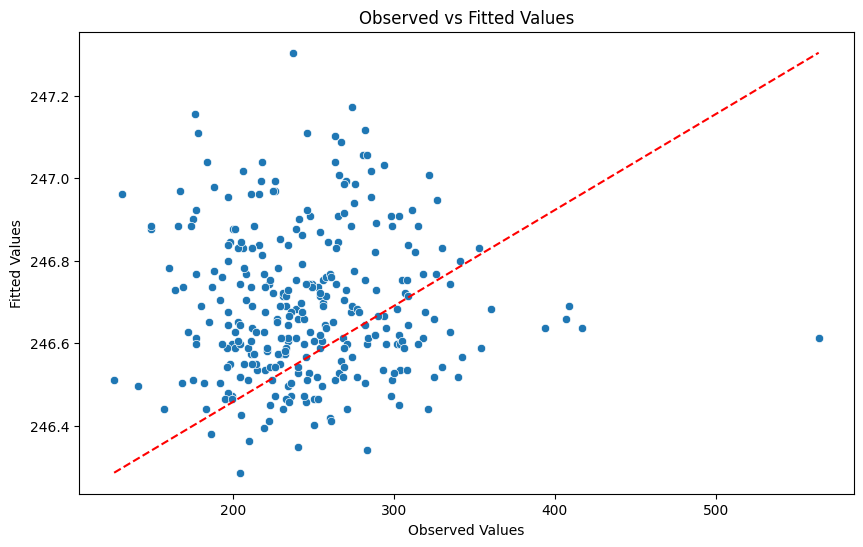

In [26]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['chol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['chol']), max(df['chol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [27]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.947238564491272, p-value=5.888153076227809e-09


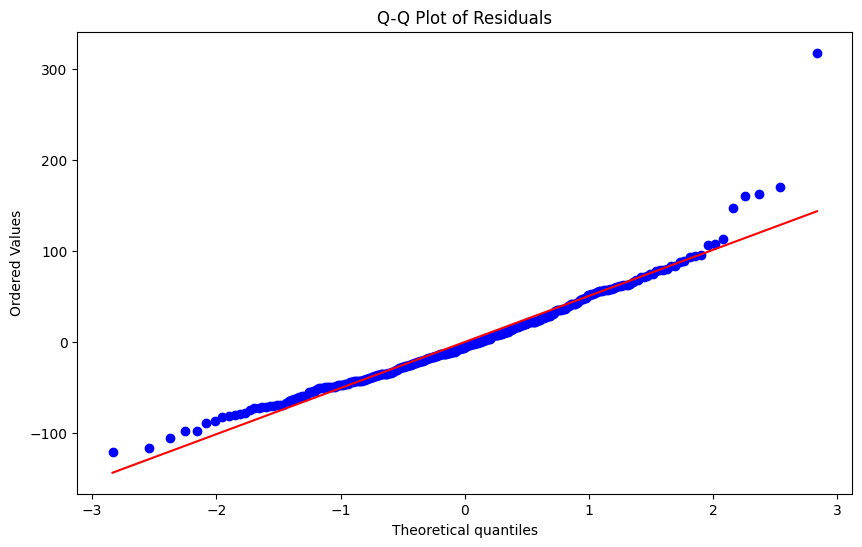

In [28]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [29]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

## Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
## It divides the data into two groups and compares the variance of the residuals in the two groups.

Goldfeld-Quandt Test: F-statistic=1.2583929885790026, p-value=0.08052171935327797


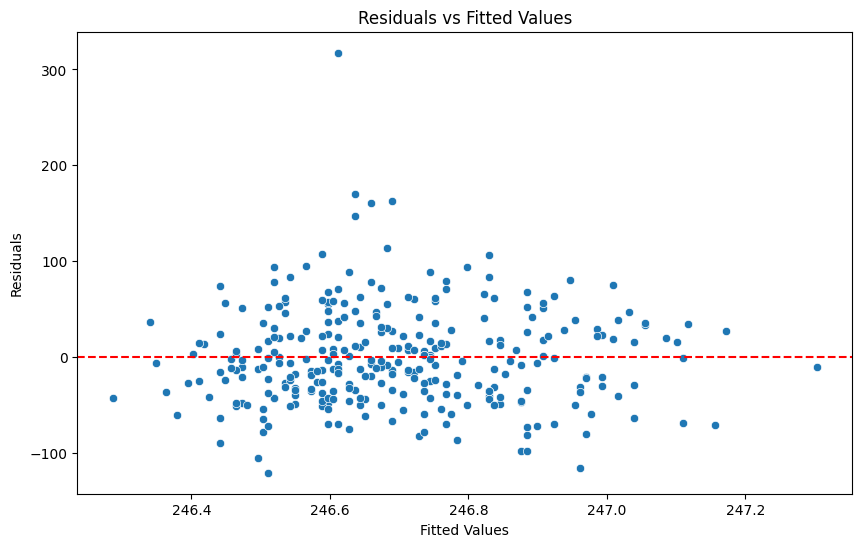

In [30]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Model Evaluation

Calculate and interpret the R-squared value for your regression model.
Discuss the model's adequacy in predicting the dependent variable.

### Insights

The reasoning behind your dataset and variable choices.
Any challenges faced during the analysis.
Insights or patterns observed from the regression outcomes.

## Multiple Linear Regression

Fit a multiple linear regression model and predict values.

Discuss the significance of each variable based on their coefficients and p-values.

Do they positively or negatively influence the dependent variable?

Check the assumptions for the multiple regression model.

In [33]:
# Fit the regression model
X = df2[['Glucose', 'BloodPressure','SkinThickness','Insulin']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df2['DiabetesPedigreeFunction']
model = sm.OLS(y, X)
results = model.fit()

In [34]:
# Print summary of the regression
print(results.summary())
R-squared: 0.056

                               OLS Regression Results                               
Dep. Variable:     DiabetesPedigreeFunction   R-squared:                       0.056
Model:                                  OLS   Adj. R-squared:                  0.051
Method:                       Least Squares   F-statistic:                     11.34
Date:                      Thu, 09 Nov 2023   Prob (F-statistic):           6.02e-09
Time:                              01:21:58   Log-Likelihood:                -218.70
No. Observations:                       768   AIC:                             447.4
Df Residuals:                           763   BIC:                             470.6
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

### Checking Assumptions

In [36]:
residuals2 = results.resid
fitted2 = results.fittedvalues

In [37]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)



VIF Data:
        Variable        VIF
0          const  25.802829
1        Glucose   1.162936
2  BloodPressure   1.070299
3  SkinThickness   1.303469
4        Insulin   1.402659


In [38]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")


Rainbow Test: stat=0.9878844748169762, p-value=0.5474365582636989


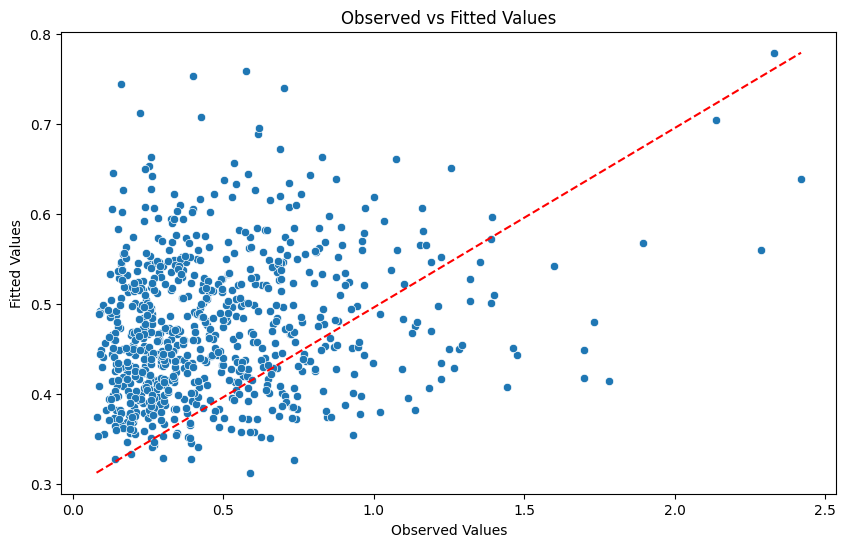

In [39]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['DiabetesPedigreeFunction'], y=fitted2)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df2['DiabetesPedigreeFunction']), max(df2['DiabetesPedigreeFunction'])], [min(fitted2), max(fitted2)], color='red', linestyle='--')
plt.show()



In [40]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals2)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")


Shapiro-Wilk Test: W=0.8643965721130371, p-value=3.2235578157453555e-25


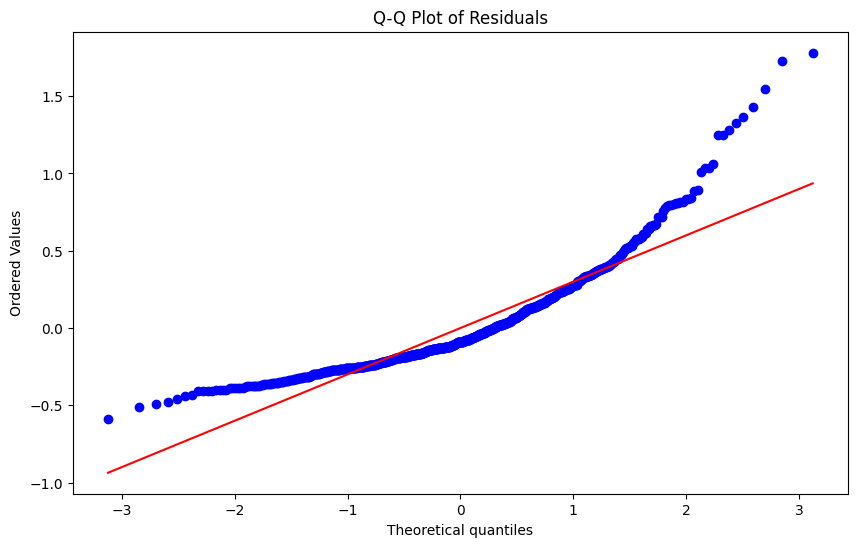

In [41]:

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals2, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [42]:
##### Assessing the homogeneity of variance of the residuals
gq_test2 = het_goldfeldquandt(residuals2, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test2[0]}, p-value={gq_test2[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).


Goldfeld-Quandt Test: F-statistic=0.827763655011804, p-value=0.966925224603908


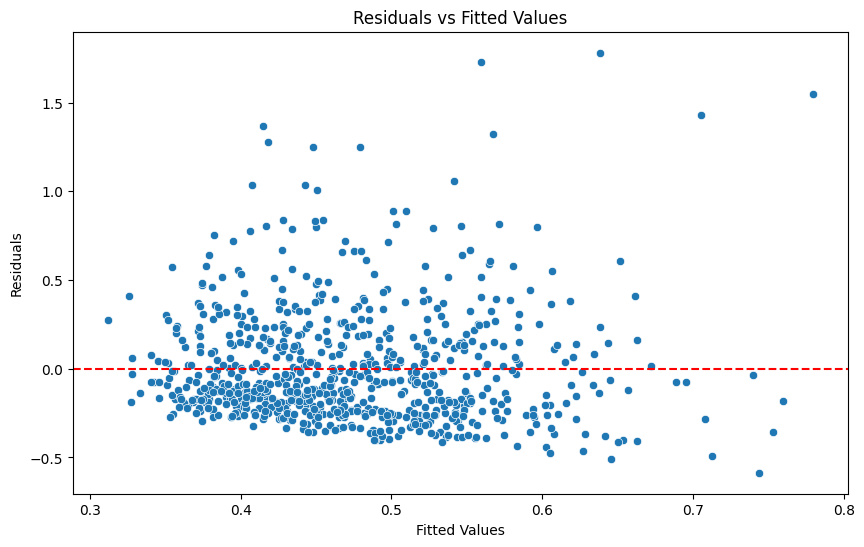

In [43]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Model Evaluation

Calculate and interpret the R-squared value for your regression model.
Discuss the model's adequacy in predicting the dependent variable.

### Insights



The reasoning behind your dataset and variable choices.
Any challenges faced during the analysis.
Insights or patterns observed from the regression outcomes.